#Import Essential Libararies

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from collections import defaultdict

In [0]:
img = cv2.imread('baw.png')

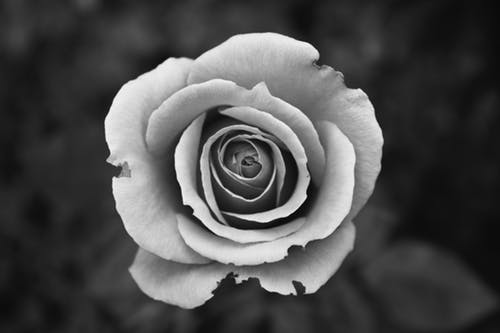

In [0]:
cv2_imshow(img)

In [0]:
def grayscale(timg):
  grey_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      grey_img[i][j] = sum(timg[i][j])/3
  return grey_img

#Calculate Negative

In [0]:
def negative(timg):
  timg = grayscale(timg)
  inv_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      inv_img[i][j] = 255 - timg[i][j]
  return inv_img

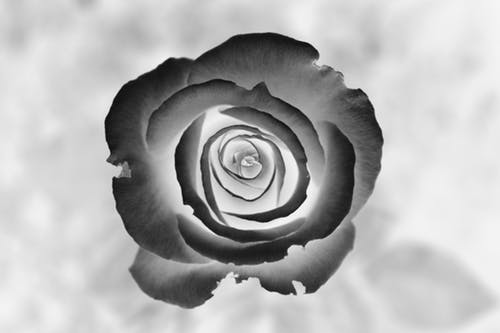

In [0]:
cv2_imshow(negative(img))

#Remove Highly Dark and White Regions

In [0]:
def remExtreme(timg):
  timg = grayscale(timg)
  inv_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      if( timg[i][j] >=  200 ):
        inv_img[i][j] = 150
      elif timg[i][j] <=  50 :
        inv_img[i][j] = 100
      else:
        inv_img[i][j] = timg[i][j]
  return inv_img

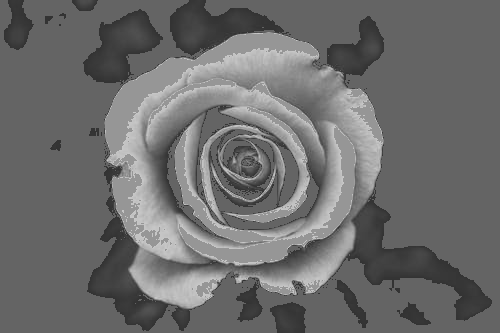

In [0]:
cv2_imshow(remExtreme(img))

#Remove Background

In [0]:
def remBG(timg):
  timg = grayscale(timg)
  inv_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      if( timg[i][j] >=  100 and  timg[i][j] <=  100):
        inv_img[i][j] = 0
      else:
        inv_img[i][j] = timg[i][j]
  return inv_img

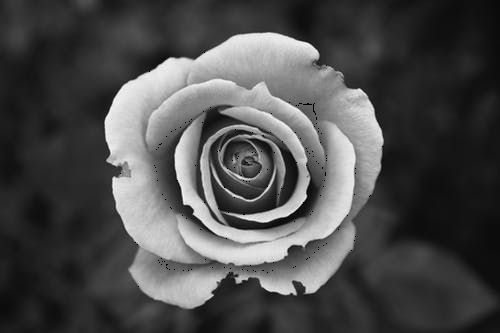

In [0]:
cv2_imshow(remBG(img))

#Non-Linear Stretching 

In [0]:
def logStretch(timg):
  timg = grayscale(timg)
  inv_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      inv_img[i][j] = 45*np.log(1 + timg[i][j])
  return inv_img

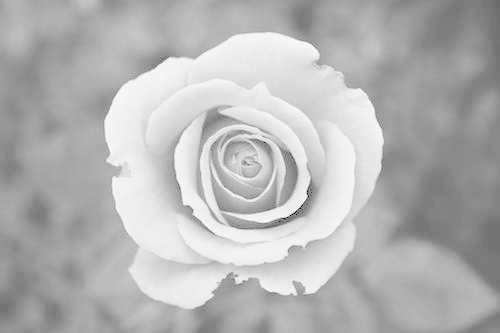

In [0]:
cv2_imshow(logStretch(img))

In [0]:
cm = cv2.imread('cm.png')

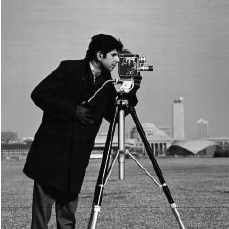

In [0]:
cv2_imshow(cm)

#Seperate Foreground Object

In [0]:
def sepCm(timg):
  timg = grayscale(timg)
  inv_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      if(timg[i][j] < 5 or timg[i][j] > 60 ):
        inv_img[i][j] = 255
      else:  
        inv_img[i][j] = timg[i][j]
  return inv_img

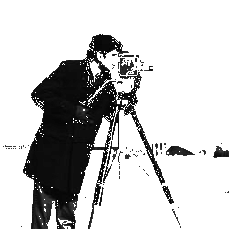

In [0]:
cv2_imshow(sepCm(cm))

#Brighten Foreground Object

In [0]:
def brightCm(timg):
  timg = grayscale(timg)
  inv_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      if(timg[i][j] < 5 or timg[i][j] > 50 ):
        inv_img[i][j] = timg[i][j]
      else:  
        inv_img[i][j] = 0.5*np.log(1 + timg[i][j])
  return inv_img

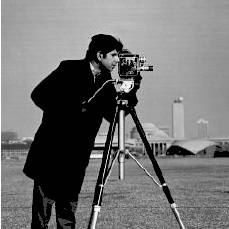

In [0]:
cv2_imshow(brightCm(cm))

In [0]:
def horizontal_add(img, img2):
  return np.concatenate((img, img2), axis=1)

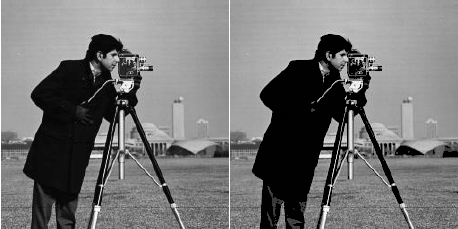

In [0]:
cv2_imshow(horizontal_add(grayscale(cm), brightCm(cm)))

#Local Histogram

In [0]:
pout = cv2.imread('pout.jpg')

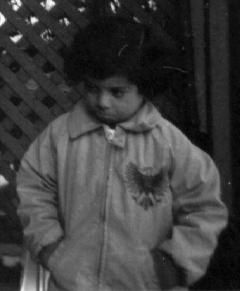

In [0]:
cv2_imshow(pout)

In [0]:
mean = np.mean(grayscale(pout))
variance = np.var(grayscale(pout))
print(mean, variance)

61.71470504009164 1551.1636382864235


In [0]:
# window size is 5
def local_hist(timg,L):
  lt = 5
  mid = int(lt/2)
  mv = [-2,-1,0,1,2]
  nimg = np.zeros((timg.shape[0] + 2*mid, timg.shape[1] + 2*mid))
  for i in range(mid,timg.shape[0] + mid):
    for j in range(mid, timg.shape[1] + mid):
      nimg[i][j] = timg[i - mid][j - mid]
  for i in range(mid ,mid + timg.shape[0]):
    for j in range(mid, mid + timg.shape[1]):
      dict = defaultdict(int)
      for k1 in range(lt):
        for k2 in range(lt):
          dict[nimg[i + mv[k1]][j + mv[k2]]] += 1
      ans = 0
      for key, val in dict.items():
        ans+=val
        if( key == nimg[i][j]):
          break
      ans*=(L-1)
      ans/=(lt*lt)
      timg[i-mid][j-mid] = ans
  return timg

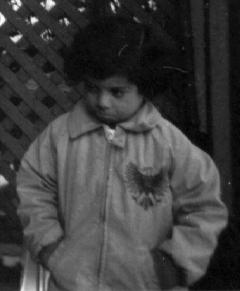

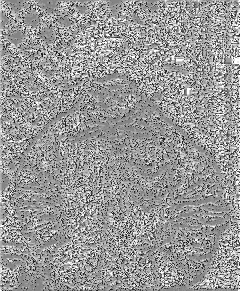

In [0]:
cv2_imshow(grayscale(pout))
cv2_imshow(local_hist(grayscale(pout), 256))